In [1]:
#Reference: https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from urllib2 import Request, urlopen
import json
from datetime import date, datetime
import matplotlib.dates as mdates


In [2]:

#Read JSON file as a panda's dataframe
jsonFile = "AllTweetsSentToDiscord.json"
data = pd.read_json(jsonFile)

#print data

                                      author                date  \
65                                   Discord 2015-06-01 07:51:58   
37622                                Discord 2016-02-05 21:57:35   
44507                                 embopp 2017-01-17 23:57:39   
44508                        NoFaceRemembers 2017-01-17 23:57:39   
44509                                  Rashe 2017-01-17 23:56:41   
44510   Oori ʕง•ᴥ•ʔง Pippinpaddleopsicopolis 2017-01-17 23:54:51   
44511                       🦄[TPwn] Athena 🦄 2017-01-17 23:52:21   
44512       Lewdicolo :blue_checkmark_emoji: 2017-01-17 23:52:04   
44513                          BigBubbaBooth 2017-01-17 23:49:44   
44514                               nickleeb 2017-01-17 23:48:47   
44516                        ArkquishNetwork 2017-01-17 23:47:44   
44517                    Heather McKinnon  💜 2017-01-17 23:47:28   
44518                            Lance James 2017-01-17 23:44:16   
44519                                 Jeremy 201

/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


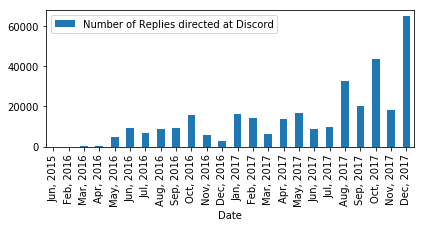

In [12]:
#Graph using just the "@" sign for mentions
"""df = pd.DataFrame({'date': data["timestamp"]})"""
df2 = pd.DataFrame({'date': data["timestamp"], 'text': data["text"], "id": data["id"], "author": data["fullname"]})
df2["text"] = df2["text"].str.lower()

df = df2[df2['text'].str.contains('@discordapp')==False]
print df
#df3 =  df2[df2["text"].str.contains('@discordapp')==False]
#df = df3
del df["text"]
del df["author"]
del df["id"]
df['count'] = 1

#Count per month
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
del df['date']

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Number of Replies directed at Discord"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)

gb['Date'] = pd.to_datetime(gb['Date'])
print gb
del gb['Year']
del gb['Month']


#Drop January
gb.drop(gb.tail(1).index,inplace=True)
gb = gb.reindex(columns=["Date", "Number of Replies directed at Discord"])

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('DirectRepliesTowardsDiscord.png')

In [4]:
df2 = pd.DataFrame({'date': data["timestamp"], 'text': data["text"]})
df2["text"] = df2["text"].str.lower()

#df = df2[df2['text'].str.contains('@discordapp')]
#print df

df3 =  df2[df2["text"].str.contains('@discordapp')==False]
print df3

                      date                                               text
65     2015-06-01 07:51:58  an easy to embed no-programming-required widge...
37622  2016-02-05 21:57:35  @zaiketsu can you right click any of those and...
44507  2017-01-17 23:57:39  can't wait to stop by! will there be snacks? t...
44508  2017-01-17 23:57:39                                             hello 
44509  2017-01-17 23:56:41                              aight, thanks guys <3
44510  2017-01-17 23:54:51  i hope i can convince him to reinstall, idk if...
44511  2017-01-17 23:52:21                                                me!
44512  2017-01-17 23:52:04                                     i'll be there!
44513  2017-01-17 23:49:44  no. the picture in the notification is one of ...
44514  2017-01-17 23:48:47             god damnit... can you fix that please?
44516  2017-01-17 23:47:44  beeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...
44517  2017-01-17 23:47:28     we definitely will! pic.twitter.c

In [10]:


authors = df3["author"].tolist()
ids = df3["id"].tolist()

urls = []

for a, b in zip(authors, ids):
    url = "https://twitter.com/" + a + "/status/" + str(b)
    urls.append(url)

print urls[:10]
import simplejson
f = open('NotIncludeDiscordAppTweets.txt', 'w')
simplejson.dump(urls, f)
f.close()

[u'https://twitter.com/Discord/status/605280614313361408', u'https://twitter.com/Discord/status/695728000403308544', u'https://twitter.com/embopp/status/821506805499121664', u'https://twitter.com/NoFaceRemembers/status/821506802508406784', u'https://twitter.com/Rashe/status/821506562141384704', u'https://twitter.com/Oori \u0295\u0e07\u2022\u1d25\u2022\u0294\u0e07 Pippinpaddleopsicopolis/status/821506097752182784', u'https://twitter.com/\xa0\U0001f984[TPwn] Athena\xa0\U0001f984/status/821505470783426560', u'https://twitter.com/Lewdicolo :blue_checkmark_emoji:/status/821505397802438656', u'https://twitter.com/BigBubbaBooth/status/821504810247655424', u'https://twitter.com/nickleeb/status/821504571080118272']


In [8]:
#all data
df = pd.DataFrame({'date': data["timestamp"]})
df['count'] = 1

#Count per month
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
del df['date']

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month), (df.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Number of Tweets  & Replies directed at Discord"]
gb['Date'] = gb[['Year', 'Month', 'Day']].apply(lambda x: '-'.join(x.astype(str)), axis=1)

gb['Date'] = pd.to_datetime(gb['Date'])
print gb
del gb['Year']
del gb['Month']
del gb['Day']


#Drop January
"""gb.drop(gb.tail(1).index,inplace=True)
gb = gb.reindex(columns=["Date", "Number of Tweets  & Replies directed at Discord"])
fd3 = gb

ax = gb.set_index('Date').plot(kind='bar')
plt.show()
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
"""



gb.to_csv("TweetsDirectedAtDiscord2.csv")

     Year  Month  Day  Number of Tweets  & Replies directed at Discord  \
0    2015      5   13                                                1   
1    2015      5   15                                                1   
2    2015      5   18                                                1   
3    2015      5   19                                                3   
4    2015      5   20                                                4   
5    2015      5   24                                                2   
6    2015      5   25                                                1   
7    2015      5   26                                                2   
8    2015      5   28                                                2   
9    2015      5   30                                               13   
10   2015      5   31                                                9   
11   2015      6    1                                               11   
12   2015      6    2                 

In [13]:
"""df = pd.DataFrame({'date': data["timestamp"]})"""
del df["text"]
df['count'] = 1

#Count per month
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
del df['date']

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Number of Original Tweets Directed at Discord"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)

gb['Date'] = pd.to_datetime(gb['Date'])
print gb
del gb['Year']
del gb['Month']


#Drop January
gb.drop(gb.tail(1).index,inplace=True)
gb = gb.reindex(columns=["Date", "Number of Original Tweets Directed at Discord"])

fd1 = gb
ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('TweetsSentToDiscord.png')

KeyError: 'text'

/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


    Year  Month  Number of Replies directed at Discord       Date
0   2015      6                                      1 2015-06-01
1   2016      2                                      1 2016-02-01
2   2016      3                                     40 2016-03-01
3   2016      4                                     30 2016-04-01
4   2016      5                                   4921 2016-05-01
5   2016      6                                   9373 2016-06-01
6   2016      7                                   6931 2016-07-01
7   2016      8                                   8630 2016-08-01
8   2016      9                                   9423 2016-09-01
9   2016     10                                  15549 2016-10-01
10  2016     11                                   5710 2016-11-01
11  2016     12                                   2698 2016-12-01
12  2017      1                                  16202 2017-01-01
13  2017      2                                  14115 2017-02-01
14  2017  

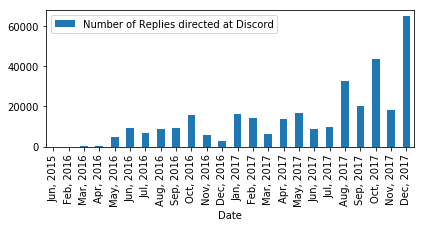

In [28]:
"""df = pd.DataFrame({'date': data["timestamp"]})"""
df2 = pd.DataFrame({'date': data["timestamp"], 'text': data["text"], "id": data["id"], "author": data["fullname"]})
df2["text"] = df2["text"].str.lower()

df = df2[df2['text'].str.contains('@discordapp')]
df3 =  df2[df2["text"].str.contains('@discordapp')==False]
df = df3
del df["text"]
del df["author"]
del df["id"]
df['count'] = 1

#Count per month
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
del df['date']

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Number of Replies directed at Discord"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)

gb['Date'] = pd.to_datetime(gb['Date'])
print gb
del gb['Year']
del gb['Month']


#Drop January
gb.drop(gb.tail(1).index,inplace=True)
gb = gb.reindex(columns=["Date", "Number of Replies directed at Discord"])

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('RepliesSentToDiscord.png')

    Year  Month  Number of Tweets  & Replies directed at Discord       Date
0   2015      5                                               39 2015-05-01
1   2015      6                                              309 2015-06-01
2   2015      7                                              572 2015-07-01
3   2015      8                                             2155 2015-08-01
4   2015      9                                             3246 2015-09-01
5   2015     10                                             6273 2015-10-01
6   2015     11                                             5443 2015-11-01
7   2015     12                                             7625 2015-12-01
8   2016      1                                             9816 2016-01-01
9   2016      2                                             7659 2016-02-01
10  2016      3                                            12649 2016-03-01
11  2016      4                                            18200 2016-04-01
12  2016    

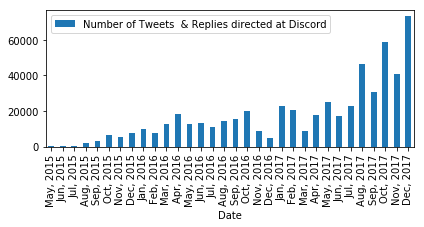

In [3]:
df = pd.DataFrame({'date': data["timestamp"]})
df['count'] = 1

#Count per month
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
del df['date']

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Number of Tweets  & Replies directed at Discord"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)

gb['Date'] = pd.to_datetime(gb['Date'])
print gb
del gb['Year']
del gb['Month']


#Drop January
gb.drop(gb.tail(1).index,inplace=True)
gb = gb.reindex(columns=["Date", "Number of Tweets  & Replies directed at Discord"])
fd3 = gb

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('TweetsRepliesSentToDiscord.png', bbox_inches='tight')

In [4]:
#Save to csv
gb.to_csv("TweetsDirectedAtDiscord2.csv")

    Year  Month  Number of Tweets directed at Discord       Date
0   2015      3                                     2 2015-03-01
1   2015      4                                     2 2015-04-01
2   2015      5                                     6 2015-05-01
3   2015      6                                    41 2015-06-01
4   2015      7                                    19 2015-07-01
5   2015      8                                    13 2015-08-01
6   2015      9                                    10 2015-09-01
7   2015     10                                     4 2015-10-01
8   2015     11                                     1 2015-11-01
9   2015     12                                     6 2015-12-01
10  2016      1                                     5 2016-01-01
11  2016      2                                  3376 2016-02-01
12  2016      3                                  2204 2016-03-01
13  2016      4                                  9644 2016-04-01
14  2016      5          

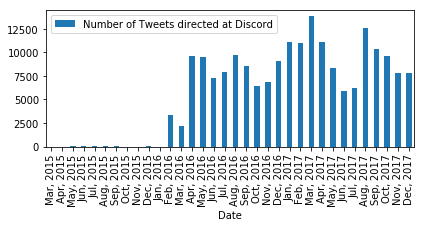

In [23]:
#Read JSON file as a panda's dataframe
#FROM DISCORD
jsonFile = "DiscordSentTweets.json"
data2 = pd.read_json(jsonFile)

df = pd.DataFrame({'date': data2["timestamp"]})
#del df["text"]
df['count'] = 1

#Count per month
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
del df['date']

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Number of Tweets directed at Discord"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)

gb['Date'] = pd.to_datetime(gb['Date'])
print gb
del gb['Year']
del gb['Month']

#Drop January
gb.drop(gb.tail(1).index,inplace=True)
gb = gb.reindex(columns=["Date", "Number of Tweets directed at Discord"])


ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('TweetsSentBYDiscord.png')
fd2 = gb

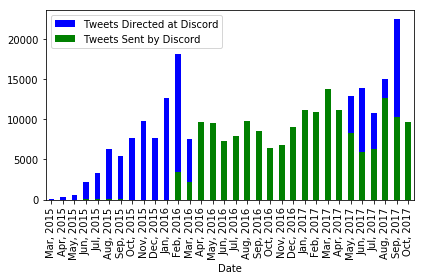

In [13]:
fig = plt.figure()

ax = fd1.plot(kind='bar', color="blue")
ax2 = fd2.plot(ax=ax, color="green", kind='bar')
ax2.set_xlabel("Date")
#Relabel legend
ax2.legend(["Tweets Directed at Discord", "Tweets Sent by Discord"]);
#plt.yscale('log')
ax2.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
plt.tight_layout()
retweetsImage = ax2.get_figure()
retweetsImage.savefig('CombinedTweetsToFromDiscord.png')



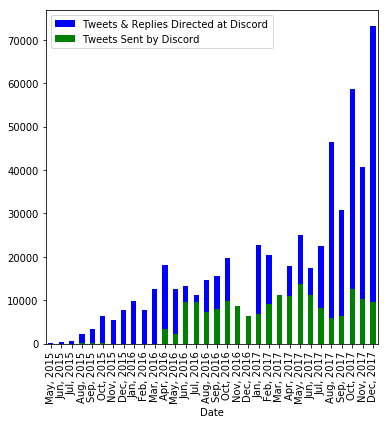

In [34]:
fig = plt.figure()

#print fd3.shape
#fd2.drop(fd2.tail(2).index,inplace=True)
#print fd2.shape

ax = fd3.plot(kind='bar', color="blue")
ax2 = fd2.plot(ax=ax, color="green", kind='bar', stacked=True, figsize=(5.5,6))
ax2.set_xlabel("Date")
#Relabel legend
ax2.legend(["Tweets & Replies Directed at Discord", "Tweets Sent by Discord"]);
#plt.yscale('log')
ax2.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
plt.tight_layout()
retweetsImage = ax2.get_figure()
retweetsImage.savefig('CombinedTweetsandRepliesByDiscord.png')

